In [12]:
import numpy  as np
import pandas as pd
from metrics import MAE
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

In [2]:
X_train = pd.read_pickle("../../../Datasets/final/X_train.pkl").drop(columns=["gPlusUserId", "gPlusPlaceId"])
c = X_train.columns.tolist()
X_train = X_train.to_numpy()
X_val = pd.read_pickle("../../../Datasets/final/X_val.pkl").drop(columns=["gPlusUserId", "gPlusPlaceId"]).to_numpy()
X_test = pd.read_pickle("../../../Datasets/final/X_test.pkl").drop(columns=["gPlusUserId", "gPlusPlaceId"]).to_numpy()
y_train = pd.read_pickle("../../../Datasets/final/y_train.pkl").to_numpy()
y_val = pd.read_pickle("../../../Datasets/final/y_val.pkl").to_numpy()
y_test = pd.read_pickle("../../../Datasets/final/y_test.pkl").to_numpy()

In [3]:
best_model = None
best_mae = np.Inf

for alpha in [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3]:
    r = Ridge(alpha=alpha)
    r.fit(X_train, y_train)
    
    y_pred_val = r.predict(X_val)
    mae_val = MAE(predictions=y_pred_val, labels=y_val)[0]
    print(f"Alpha: {alpha}, MAE: {mae_val}")
    
    if mae_val < best_mae:
        best_mae = mae_val
        best_model = r

Alpha: 0.001, MAE: 0.35668190692776397
Alpha: 0.01, MAE: 0.3566818987505277
Alpha: 0.1, MAE: 0.3566818175889849
Alpha: 1.0, MAE: 0.35668105367310543
Alpha: 10.0, MAE: 0.3566752161951709
Alpha: 100.0, MAE: 0.35663456250249176
Alpha: 1000.0, MAE: 0.3565587255214971


In [4]:
best_model, best_mae

(Ridge(alpha=1000.0), 0.3565587255214971)

In [5]:
y_pred = best_model.predict(X_test)

In [6]:
MAE(predictions=y_pred, labels=y_test)[0]

0.35651162288601534

In [10]:
dic = dict(zip(c, r.coef_[0]))
feature = list(dic.keys())
freq = list(dic.values())
freq = [ abs(f) for f in freq]

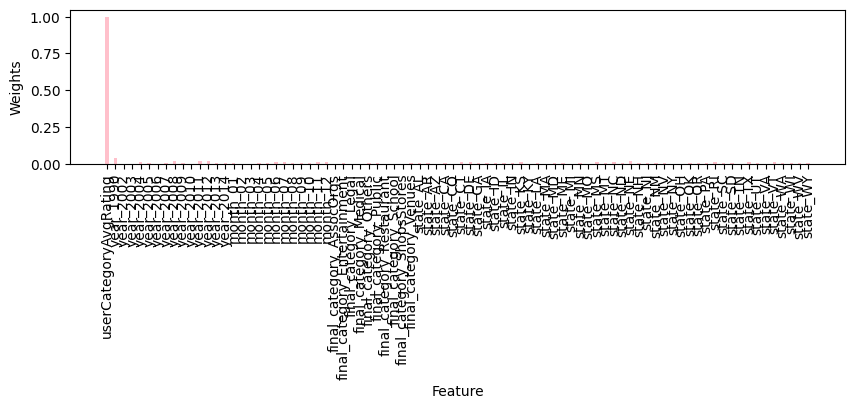

In [19]:
fig = plt.figure(figsize = (10, 2))
plt.bar(feature, freq, color ='pink',width = 0.4)

plt.xlabel("Feature")
plt.ylabel("Weights")
plt.xticks(rotation=90)
plt.show()